# 基因数据分析

加载python模块

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

定义必要的函数

In [524]:
def decode(datum):
    y = np.zeros((datum.shape[0],1))
    for i in range(datum.shape[0]):
        y[i] = np.argmax(datum[i])
    return y
def encode(datum):
    return to_categorical(datum)

初始化网络参数和学习参数

In [525]:
np.random.seed(1)
inner_activation_fun = 'relu'
outer_activation_fun = 'softmax'
optimizer_loss_fun   = 'binary_crossentropy'
optimizer_algorithm  = 'sgd'
number_inner_layers  = 5
number_inner_neurons = [256,128,64,16,2]
number_epoch         = 200
batch_length         = 10
show_inter_results   = 1

读入样本数据，每行一个样本。

In [526]:
DataFrame_tr = pd.read_excel('genetest-1007.xls',sheet_name='B5-归一')  #训练数据 
#DataFrame_tr = pd.read_excel('genetest-1007.xls',sheet_name='B3')  #训练数据 
Data_tr = DataFrame_tr.iloc[0:,1:].values #test-18.xlsx中的数据在DataFrame中是从第二行第三列开始的
Data_tr=Data_tr.astype(float)
x = Data_tr[:,1:]                    #基因数据是从第二列开始的
Label_tr = Data_tr[:,0]; Label_tr = Label_tr.astype(int); #类别（正常人/病患）数据在第一列
y = encode(Label_tr)

#DataFrame_v = pd.read_excel('genetest-0923.xls',sheet_name='B2-归一-后半')  #训练数据 
#Data_v = DataFrame_v.iloc[0:,1:].values #test-18.xlsx中的数据在DataFrame中是从第二行第三列开始的
#Data_v=Data_v.astype(float)
#vx = Data_v[:,1:]                    #基因数据是从第二列开始的
#Label_v = Data_v[:,0]; Label_v = Label_v.astype(int); #类别（正常人/病患）数据在第一列

In [527]:
#搭建神经网络模型用训练数据训练，这是一个有三个隐层的全连接网络

In [528]:
model = Sequential()
#for i in range(number_inner_layers):
#    print(i)
#    model.add(Dense(int(number_inner_neurons[i]), input_dim = x.shape[1], activation = inner_activation_fun))
model.add(Dense(int(number_inner_neurons[0]), input_dim = x.shape[1], activation = inner_activation_fun))
model.add(Dense(int(number_inner_neurons[1]), input_dim = x.shape[1], activation = inner_activation_fun))
model.add(Dense(int(number_inner_neurons[2]), input_dim = x.shape[1], activation = inner_activation_fun))
model.add(Dropout(0.3))
model.add(Dense(int(number_inner_neurons[3]), input_dim = x.shape[1], activation = inner_activation_fun))
model.add(Dropout(0.3))
model.add(Dense(int(number_inner_neurons[4]), input_dim = x.shape[1], activation = inner_activation_fun))
model.add(Dense(y.shape[1], activation = outer_activation_fun))
model.compile(loss = optimizer_loss_fun, optimizer = optimizer_algorithm, metrics = ['accuracy'])
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_270 (Dense)           (None, 256)               60928     
                                                                 
 dense_271 (Dense)           (None, 128)               32896     
                                                                 
 dense_272 (Dense)           (None, 64)                8256      
                                                                 
 dropout_90 (Dropout)        (None, 64)                0         
                                                                 
 dense_273 (Dense)           (None, 16)                1040      
                                                                 
 dropout_91 (Dropout)        (None, 16)                0         
                                                                 
 dense_274 (Dense)           (None, 2)               

绘制网络训练的代价曲线和准确率曲线

In [529]:
train_history = model.fit(x, y, epochs = number_epoch, batch_size = batch_length, verbose = show_inter_results)

Epoch 1/200
10/10 [==============================] - 1s 4ms/step - loss: 0.6974 - accuracy: 0.5816
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.7143
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.7143
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.7041
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.5297 - accuracy: 0.8163
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.7653
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4599 - accuracy: 0.8469
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.8265
Epoch 9/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4229 - accuracy: 0.8265
Epoch 10/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8980
Epoch 11/

10/10 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9898
Epoch 84/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0580 - accuracy: 0.9694
Epoch 85/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.9898
Epoch 86/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9898
Epoch 87/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0415 - accuracy: 0.9796
Epoch 88/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0464 - accuracy: 0.9796
Epoch 89/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0634 - accuracy: 0.9796
Epoch 90/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 91/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9898
Epoch 92/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9796
Epoch 93/200


10/10 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 165/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 166/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9898
Epoch 167/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9898
Epoch 168/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 169/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 170/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 171/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9898
Epoch 172/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 173/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000
Epoc

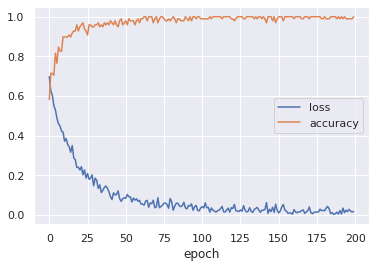

<Figure size 432x288 with 0 Axes>

In [530]:
%matplotlib inline
plt.plot(train_history.history['loss'], label='loss')
plt.plot(train_history.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('l-a.png')

In [531]:
#loss= train_history.history['loss']
#val_loss = train_history.history['val_loss']
#plt.plot(loss, label='loss')
#plt.plot(val_loss, label='val_loss')
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'valid'], loc='upper left')
#plt.show()
#plt.savefig('loss.png')

In [532]:
# 用测试数据测试
#
DataFrame_t = pd.read_excel('genetest-1007-tx.xls', sheet_name='B2-归一')  #测试数据
#DataFrame_t = pd.read_excel('genetest-1007-tx.xls', sheet_name='B5')  #测试数据
Data_t = DataFrame_t.iloc[0:,1:].values #test-18.xlsx中的数据在DataFrame中是从第二行第三列开始的
Data_t=Data_t.astype(float)
tx = Data_t[:,1:]                    #基因数据是从第二列开始的   测试数据
Label_t = Data_t[:,0]; Label_t = Label_t.astype(int); #类别（正常人/病患）数据在第一列
ty = encode(Label_t)
#test_history = model.fit(tx, ty, epochs = number_epoch, batch_size = batch_length, verbose = show_inter_results)

#test_history=model.fit(tx, ty, epochs = number_epoch, batch_size = batch_length,verbose = show_inter_results)
#scores = model.evaluate(tx, ty,verbose = show_inter_results)
y_pred_tx = model.predict(tx)
print(y_pred_tx)

[[1.00000000e+00 6.21375726e-25]
 [8.26038613e-11 1.00000000e+00]
 [2.06779038e-11 1.00000000e+00]
 [1.00000000e+00 1.60802240e-17]
 [3.84000693e-15 1.00000000e+00]
 [9.99977469e-01 2.25650183e-05]
 [1.00000000e+00 5.94244411e-21]
 [1.00000000e+00 1.39851302e-18]
 [1.00000000e+00 2.79229298e-30]
 [1.98481662e-10 1.00000000e+00]
 [1.22905303e-05 9.99987721e-01]
 [2.65866305e-11 1.00000000e+00]
 [5.62520872e-05 9.99943733e-01]
 [4.61344733e-17 1.00000000e+00]
 [1.00000000e+00 4.17765052e-14]
 [9.04008150e-02 9.09599245e-01]
 [2.41885978e-09 1.00000000e+00]
 [1.00000000e+00 1.52076831e-31]
 [4.25277267e-06 9.99995708e-01]
 [1.00000000e+00 8.72834360e-24]
 [3.52318452e-11 1.00000000e+00]
 [1.00000000e+00 7.35608554e-25]
 [1.25269434e-10 1.00000000e+00]
 [1.00000000e+00 1.50602968e-12]
 [1.00000000e+00 1.64015729e-24]
 [1.00000000e+00 1.12399512e-16]
 [1.00000000e+00 1.10260947e-14]
 [1.00000000e+00 2.79133653e-21]
 [1.91890695e-16 1.00000000e+00]
 [4.56451066e-21 1.00000000e+00]
 [1.000000

[[39  0]
 [ 1 58]]
tp,fp,fn,tn= 39 1 0 58


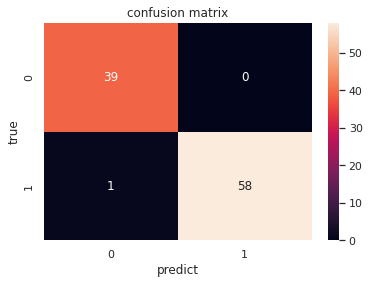

In [533]:
y_value= np.zeros(ty.shape[0])
y_value_1= np.zeros(ty.shape[0])
y_pred_v= np.zeros(ty.shape[0])
y_pred_v1= np.zeros(ty.shape[0])
for i in range(ty.shape[0]):
    y_value[i]=(decode(ty)[i][0])
    y_value_1[i]=(ty[i][0])
for i in range(ty.shape[0]):
    y_pred_v[i]=(decode(y_pred_tx)[i][0])
    y_pred_v1[i]=(y_pred_tx[i][0])
    
sns.set()
f,ax = plt.subplots()
C2=confusion_matrix(y_value,y_pred_v)
print(C2)
sns.heatmap(C2,annot=True,ax=ax)

ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')
print (f"tp,fp,fn,tn=",C2[0][0],C2[1][0],C2[0][1],C2[1][1])

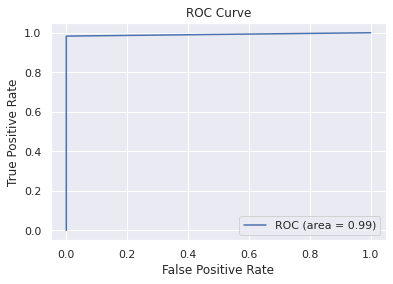

In [534]:
from sklearn.metrics import roc_curve, auc
#fpr, tpr, thersholds = roc_curve( y_value_1, y_pred_v1)
fpr, tpr, thersholds = roc_curve( Label_t, y_pred_v)
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, label='ROC (area = {0:.2f})'.format(roc_auc))
 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
 [[39  0]
 [ 0 59]]


Text(30.5, 0.5, 'true')

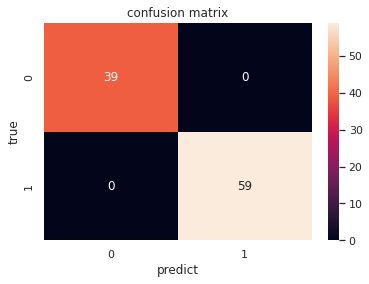

In [535]:
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(tx, Label_t)
y_pred_log = logistic_reg_model.predict(tx)
conf_matrix = confusion_matrix(Label_t, y_pred_log) 
print("Confusion Matrix:\n", conf_matrix)

sns.set()
f,ax = plt.subplots()
sns.heatmap(conf_matrix,annot=True,ax=ax)

ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

Confusion Matrix:
 [[39  0]
 [ 0 59]]


Text(30.5, 0.5, 'true')

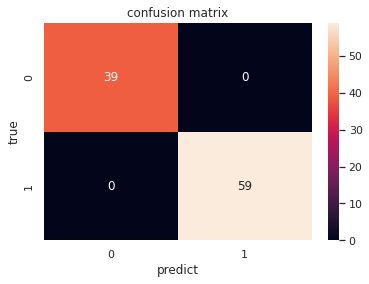

In [536]:
from sklearn.linear_model import RidgeClassifier
logistic_reg_model =RidgeClassifier()
logistic_reg_model.fit(tx, Label_t)
y_pred_rid = logistic_reg_model.predict(tx)
conf_matrix = confusion_matrix(Label_t, y_pred_rid) 
print("Confusion Matrix:\n", conf_matrix)



sns.set()
f,ax = plt.subplots()
sns.heatmap(conf_matrix,annot=True,ax=ax)

ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

Confusion Matrix:
 [[39  0]
 [ 0 59]]


Text(30.5, 0.5, 'true')

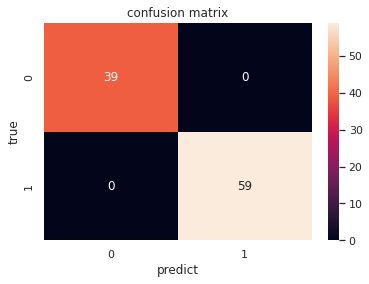

In [537]:
from sklearn.naive_bayes import GaussianNB
model_g =GaussianNB()
model_g.fit(tx, Label_t)
y_pred_g = model_g.predict(tx)
conf_matrix = confusion_matrix(Label_t, y_pred_g) 
print("Confusion Matrix:\n", conf_matrix)

sns.set()
f,ax = plt.subplots()
sns.heatmap(conf_matrix,annot=True,ax=ax)

ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')

Confusion Matrix:
 [[39  0]
 [ 0 59]]


Text(30.5, 0.5, 'true')

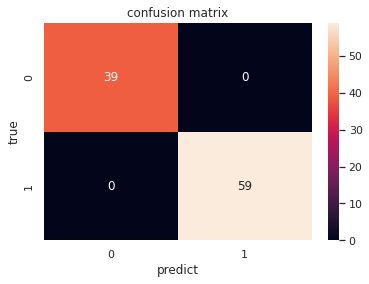

In [538]:
from sklearn.tree import DecisionTreeClassifier
model_d =DecisionTreeClassifier()
model_d.fit(tx, Label_t)
y_pred_d = model_d.predict(tx)
conf_matrix = confusion_matrix(Label_t, y_pred_d) 
print("Confusion Matrix:\n", conf_matrix)

sns.set()
f,ax = plt.subplots()
sns.heatmap(conf_matrix,annot=True,ax=ax)

ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')